In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

import os
import glob
import re
import sys
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib import animation, rc

# import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import plotly.express as px
import folium
from folium import plugins
import branca
import json

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
case = pd.read_csv('/content/drive/MyDrive/aiffel/dacon/corona19/Case.csv')
pat_info = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/PatientInfo.csv")
pat_route = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/PatientRoute.csv")
policy = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/Policy.csv")
region = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/Region.csv")
search_trend = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/SearchTrend.csv")
seoul_floating = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/SeoulFloating.csv")
time = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/Time.csv")
time_age = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/TimeAge.csv")
time_gender = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/TimeGender.csv")
time_province = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/TimeProvince.csv")
weather = pd.read_csv("/content/drive/MyDrive/aiffel/dacon/corona19/Weather.csv")


1. csv 둘러보기 
  * 간략정보( 건수 및 column 확인 )
  * 결측치 확인
  * unique 확인
  * head / tail / value_counts 확인

2. EDA


3. 데이터 전처리 


4. 시각화


#### 1. case : 감염사례
* case_id: 감염사례의 id
* province: 특별시 / 광역시/ 도
* city: 시/ 군/ 구
* group: 집단감염 여부
* infection_case: 감염사례
* confirmed: 확인된 누적확진자 수
* latitude: 위도
* longitude: 경도

In [ ]:
case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
...,...,...,...,...,...,...,...,...
107,6100009,Gyeongsangnam-do,-,False,contact with patient,6,-,-
108,6100010,Gyeongsangnam-do,-,False,etc,18,-,-
109,7000001,Jeju-do,-,False,overseas inflow,9,-,-
110,7000002,Jeju-do,-,False,contact with patient,0,-,-


#### 2. patientinfo (환자정보)
* patient_id: 환자의 아이디
* global_num: KCDC(질병관리청)에서 부여한 숫자
* sex: 성별
* birth_year: 생년
* age: 나이
* country: 국적
* province: 특별시 / 광역시 / 도
* city: 시 / 군 / 구
* disease: 확진여부
* infection_case: 감염경로
* infection_order: 전파단계
* infected_by: 감염시킨 환자의 아이디
* contact_number: 접촉자 수
* symptom_onset_date: 증상발현 날짜
* confirmed_date: 확진날짜
* released_date: 퇴원날짜
* deceased_date: 사망날짜
* state: 격리 / 퇴원 / 사망

In [ ]:
pat_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


#### 3. patientroute (환자 동선)
* patient_id: 환자 아이디
* global_num: KCDC(질병관리청)에서 부여한 숫자
* date: 날짜
* province: 특별시 / 광역시 / 도
* city: 시 /군 / 구
* type: 방문장소 유형
* latitude: 위도
* longitude: 경도

In [ ]:
pat_route

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
6709,6100000090,NaN,2020-03-24,Seoul,Gangseo-gu,airport,37.558654,126.794474
6710,6100000090,NaN,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
6711,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
6712,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


#### 4. policy (정부정책)
policy_id: 정책의 아이디
country: 정책발효국가
type: 정책의 유형
gov_policy: 정부의 정책
detail: 정책 상세
start_date: 시작일
end_date: 종료일

In [ ]:
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


#### 5. region (지역 정보)
code
province
city
latitude
longitude
elementary_school_count: 초등학교 수
kindergarten_count: 유치원 수
university_count: 대학교 수
academy_ratio: 학원 수
elderly_population_ratio: 고령인구 비율
elderly_alone_ratio: 독거노인 비율
nursing_home_count: 요양원 수

In [ ]:
region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


#### 6. searchtrend (질병별 한국어 검색량)

date
cold: 감기
flu: 독감
pneumonia: 폐렴
coronavirus: 코로나

In [ ]:
search_trend

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1576,2020-04-25,0.12781,0.02709,0.08672,4.13405
1577,2020-04-26,0.13363,0.03263,0.08136,3.95342
1578,2020-04-27,0.11226,0.04427,0.10390,4.11033
1579,2020-04-28,0.11481,0.03981,0.10336,3.73088


#### 7. seoulfloating (서울 유동인구)
date : 
hour
birth_year
sex
province
city
fp_num

In [ ]:
seoul_floating

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
431995,2020-02-29,23,70,male,Seoul,Yangcheon-gu,12080
431996,2020-02-29,23,70,female,Seoul,Yeongdeungpo-gu,17750
431997,2020-02-29,23,70,male,Seoul,Yeongdeungpo-gu,13290
431998,2020-02-29,23,70,female,Seoul,Yongsan-gu,12590


#### 8. time : 시간별 환자수 
date: 날짜
time: 시각
test: 검사회수
negative: 음성판정 회수
confirmed: 양성판정 회수
released: 누적 퇴원자 수
deceased: 누적 사망자 수

In [ ]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
97,2020-04-26,0,598285,578558,10728,8717,242
98,2020-04-27,0,601660,582027,10738,8764,243
99,2020-04-28,0,608514,588559,10752,8854,244
100,2020-04-29,0,614197,595129,10761,8922,246


#### 9. timeage : 나이/일자별 확진자 / 사망자 수 
date: 날짜
time: 시각
age: 환자의 나이
confirmed: 누적 확진자 수
deceased: 누적 사망자 수

In [ ]:
time_age

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
535,2020-04-30,0,40s,1427,3
536,2020-04-30,0,50s,1956,15
537,2020-04-30,0,60s,1348,35
538,2020-04-30,0,70s,709,74


#### 11. timegender : 성별별 현황정보
date
time
sex
confirmed
deceased


In [ ]:
time_gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
115,2020-04-28,0,female,6408,116
116,2020-04-29,0,male,4348,129
117,2020-04-29,0,female,6413,117
118,2020-04-30,0,male,4352,130


#### 12. timeprovince : 지역별 발생자 수
date
time
province
confirmed
released
deceased

In [ ]:
time_province

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
1729,2020-04-30,0,Jeollabuk-do,18,11,0
1730,2020-04-30,0,Jeollanam-do,15,11,0
1731,2020-04-30,0,Gyeongsangbuk-do,1365,1147,52
1732,2020-04-30,0,Gyeongsangnam-do,117,97,0


#### 13. weather : 날씨 정보
code: 지역코드
province
date
avg_temp: 평균기온
min_temp: 최저기온
max_temp: 최고기온
precipitation: 일일 강수량
max_wind_speed: 최대풍속
most_wind_direction: 최빈풍향
avg_relative_humidity: 평균 상대 습도

In [ ]:
weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
25290,50000,Jeollabuk-do,2020-04-29,15.1,7.8,23.0,0.0,4.4,140.0,42.6
25291,51000,Jeollanam-do,2020-04-29,15.6,11.3,20.2,0.0,8.0,200.0,42.8
25292,60000,Gyeongsangbuk-do,2020-04-29,16.7,11.0,25.1,0.0,7.3,180.0,42.6
25293,61000,Gyeongsangnam-do,2020-04-29,15.2,7.6,24.5,0.0,4.2,50.0,47.0


In [ ]:
group_prov = case.groupby("province").sum()
group_prov

,case_id,group,confirmed
province,,,
Busan,9900045,6,139
Chungcheongbuk-do,20000015,2,38
Chungcheongnam-do,20500015,2,137
Daegu,10800045,6,6650
Daejeon,9000021,3,34
Gangwon-do,18000021,3,51
Gwangju,5200010,1,30
Gyeonggi-do,18000045,6,556
Gyeongsangbuk-do,72000078,9,1314


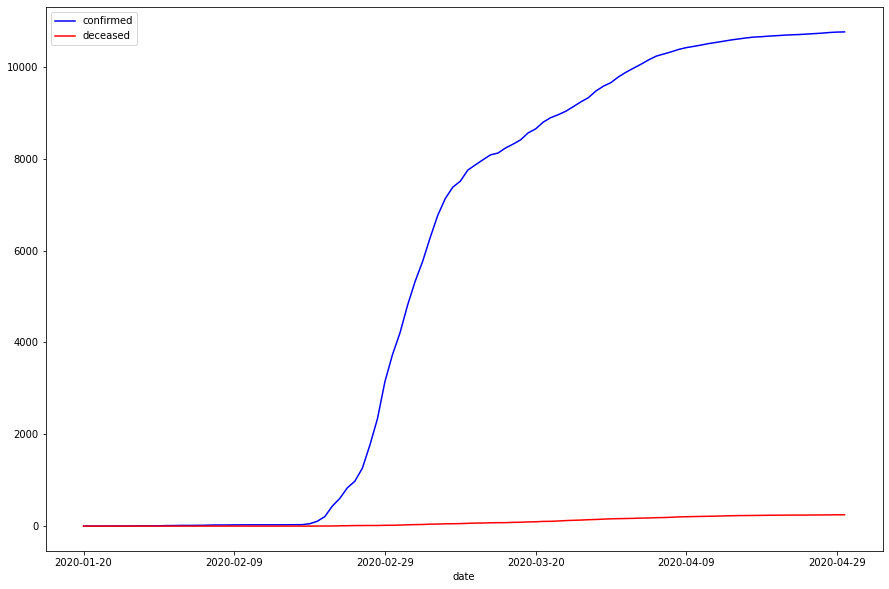

In [ ]:
f,ax = plt.subplots(1,1,figsize=(15,10))

time.plot(x='date',y='confirmed',color='blue', kind='line', ax=ax)
time.plot(x='date',y='deceased',color='red', kind='line', ax=ax)


In [ ]:
patientcount = pat_info.groupby('age').count().patient_id

fig = patientcount.iplot(asFigure=True, kind='bar')
fig.show()

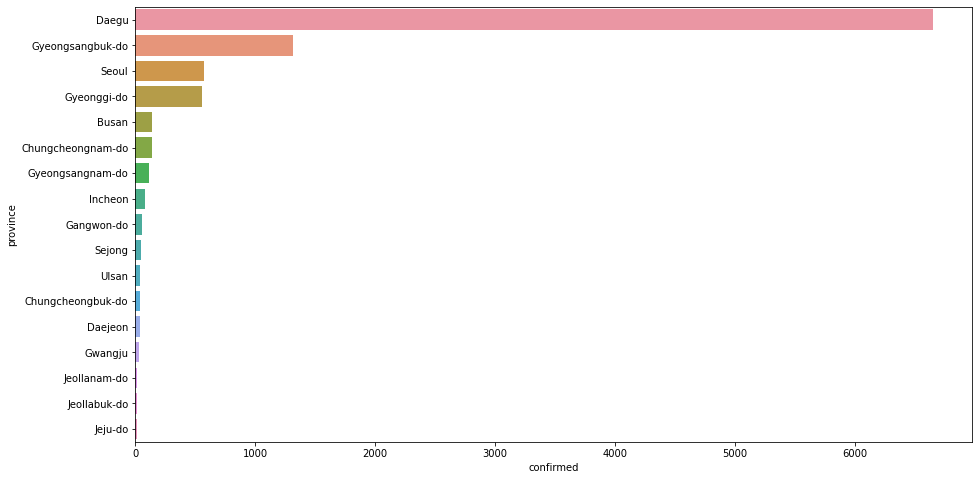

In [ ]:
group_prov = group_prov.sort_values(by="confirmed", ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x = 'confirmed', y = group_prov.index, data = group_prov)

In [ ]:
group_prov["percentage"] = group_prov["confirmed"]/group_prov["confirmed"].sum()
group_prov

,case_id,group,confirmed,percentage
province,,,,
Daegu,10800045,6,6650,0.675195
Gyeongsangbuk-do,72000078,9,1314,0.133415
Seoul,11000066,8,574,0.058280
Gyeonggi-do,18000045,6,556,0.056452
Busan,9900045,6,139,0.014113
Chungcheongnam-do,20500015,2,137,0.013910
Gyeongsangnam-do,61000055,7,115,0.011676
Incheon,7000015,2,79,0.008021
Gangwon-do,18000021,3,51,0.005178


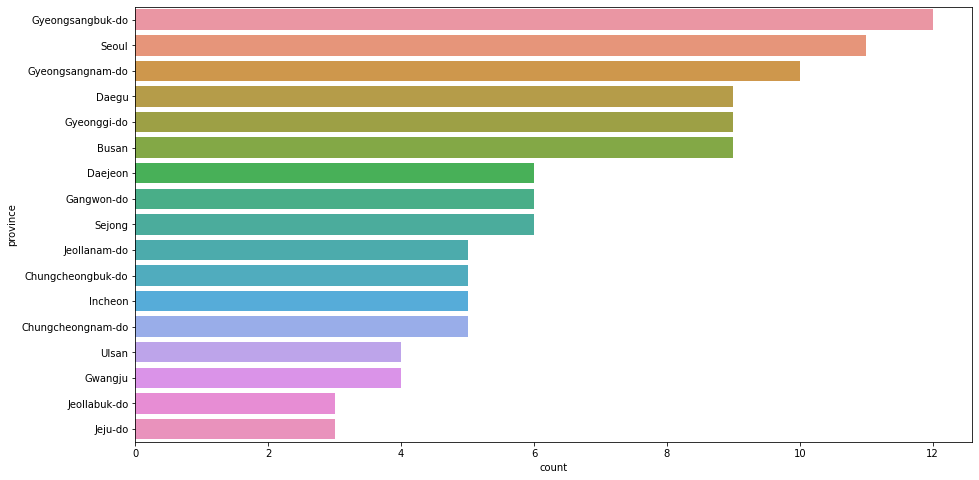

In [ ]:
# 지역별 확진자 발생 건수(집단 감염 포함)
plt.figure(figsize=(15,8))
sns.countplot(y = 'province',
              data = case,
              order = case['province'].value_counts().index)

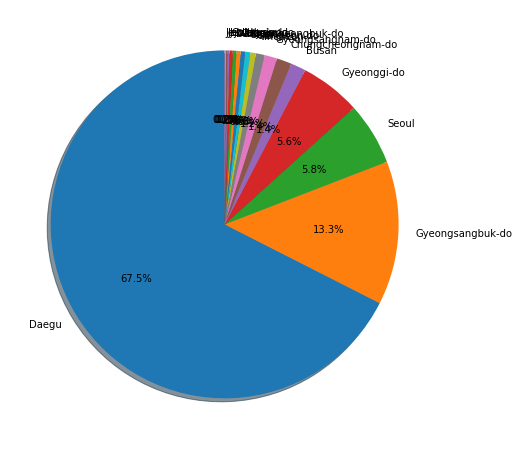

In [ ]:
labels = group_prov.index
sizes = group_prov.percentage

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

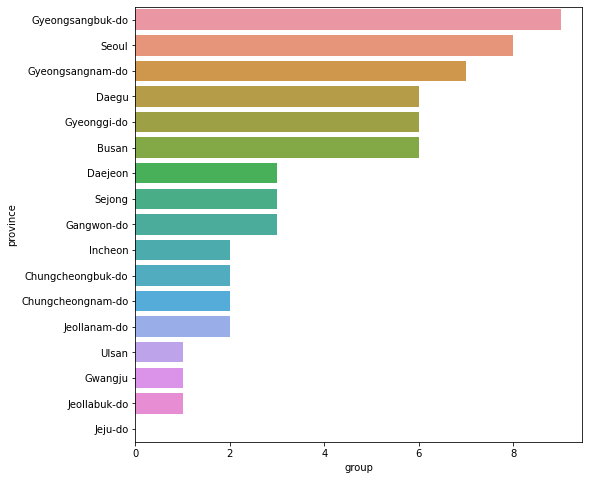

In [ ]:
group_prov = group_prov.sort_values(by="group", ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(data=group_prov, x="group", y=group_prov.index)

In [ ]:
is_seoul = case['province'] == 'Seoul'
is_daegu = case['province'] == 'Daegu'

# 둘 중 한가지 조건을 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다. (AND)
SD = case[is_seoul | is_daegu]
# 결과를 출력합니다.
SD

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
5,1000006,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
6,1000007,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377
7,1000008,Seoul,from other city,True,Shincheonji Church,8,-,-
8,1000009,Seoul,-,False,overseas inflow,321,-,-
9,1000010,Seoul,-,False,contact with patient,18,-,-


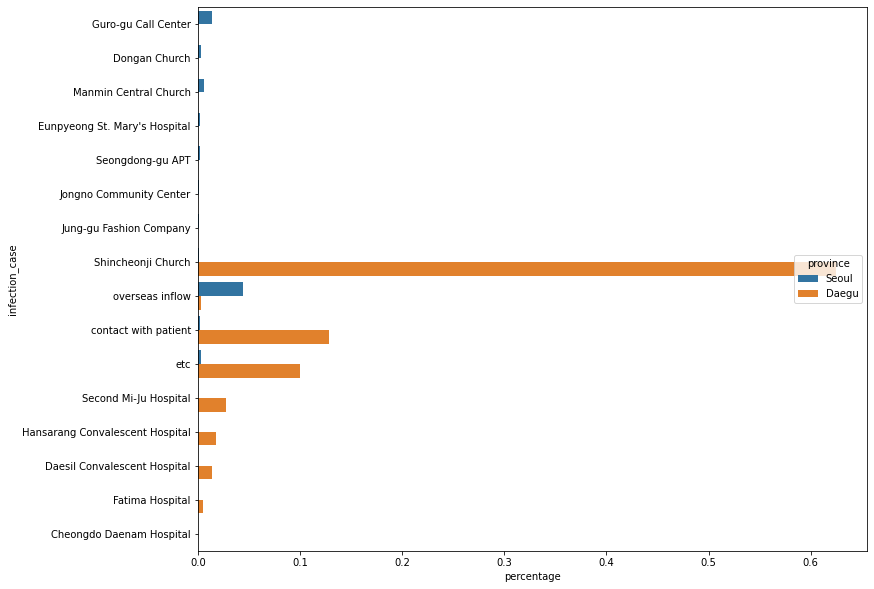

In [ ]:
# 한 행의 확진자를 총 확진자수로 나누어 확진자 비율 특성을 생성합니다.

SD["percentage"] = SD["confirmed"]/SD["confirmed"].sum()

plt.figure(figsize = (12,10))
sns.barplot(data=SD, x='percentage', y="infection_case", hue = 'province')

In [ ]:
#  ---------------------------------------------------------------------------------------------------------------------------------
#  1차 예제
#  ---------------------------------------------------------------------------------------------------------------------------------

In [ ]:
patientcount = pat_info.groupby('age').count().patient_id

fig = patientcount.iplot(asFigure=True, kind='bar')
fig.show()

확진자의 전체 연령대 분포를 살펴보면 20대가 가장 많은 것을 확인할 수 있네요!

이 사실은 상대적으로 건강하다고 여겨지는 20대가 COVID-19에 더 예방 및 면역력이 뛰어날 것이라는 생각에 배치되는 것이었습니다.

따라서 저희 팀은 "20대 확진자의 비밀"을 파헤쳐보고자 합니다!

비밀을 파헤치기 앞서, 20대와 20대 확진자의 속성부터 알아보도록 하죠.

In [ ]:
# 일별 누적확진자수 
time_province.groupby('date')['confirmed'].sum()

date
2020-01-20        1
2020-01-21        1
2020-01-22        1
2020-01-23        1
2020-01-24        2
              ...  
2020-04-26    10297
2020-04-27    10302
2020-04-28    10313
2020-04-29    10319
2020-04-30    10319
Name: confirmed, Length: 102, dtype: int64